In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import pylab as pl
import statsmodels.api as sm

In [3]:
df = pd.read_csv('grad.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "iv_school"]
df.head()

,admit,gre,gpa,iv_school
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df.describe()

,admit,gre,gpa,iv_school
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
df.std()

admit          0.466087
gre          115.516536
gpa            0.380567
iv_school      0.944460
dtype: float64

In [7]:
pd.crosstab(df['admit'], df['iv_school'], rownames=['admit'])

iv_school,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


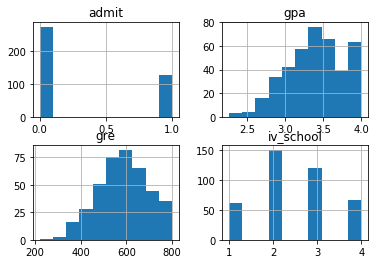

In [8]:
# plot all of the columns
df.hist()
pl.show()

In [9]:
# dummify rank
dummy_ranks = pd.get_dummies(df['iv_school'], prefix='iv_school')
dummy_ranks.head()

,iv_school_1,iv_school_2,iv_school_3,iv_school_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [10]:
# new frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'iv_school_2':])
data.head()

/home/audi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,admit,gre,gpa,iv_school_2,iv_school_3,iv_school_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [11]:
# manually add the intercept
data['intercept'] = 1.0

In [12]:
train_cols = data.columns[1:]
logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 27 Mar 2019   Pseudo R-squ.:                 0.08292
Time:                        11:20:46   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
gre             0.0023      0.001      2.070      0.038       0.000       0.004
gpa             0.8040      0.332      2.423      0.015       0.154       1.454
iv_school_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
iv_school_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
iv_school_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept      -3.9900      1.140     -3.500      0.000      -6.224      -1.756
===============================================================================
"""

In [15]:
# confidence interval of each coeffecient
result.conf_int()

,0,1
gre,0.000120,0.004409
gpa,0.153684,1.454391
iv_school_2,-1.295751,-0.055135
iv_school_3,-2.016992,-0.663416
iv_school_4,-2.370399,-0.732529
intercept,-6.224242,-1.755716
